In [1]:
%matplotlib inline

In [2]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import pandas as pd

import os
from os import path 
from time import time
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "TRAS.settings")
import django
from django.core.exceptions import ObjectDoesNotExist
django.setup()
from django.db import transaction
from django.conf import settings

from proto.models import Attraction, Route

Automatically created module for IPython interactive environment


In [3]:
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true" #SynchronousOnlyOperation  해제제

In [4]:
lati_long_list = Attraction.objects.filter(latitude__isnull=False).values_list('pk', 'latitude','longitude')

In [5]:
lati_long_list[:3]

<QuerySet [(1, 37.5773616, 126.976684), (2, 37.612085, 127.00825), (3, 37.5640907, 126.99794)]>

In [6]:
# weight = 평균 별점
#n_clusters = ??
# 밀집된 곳 좁게 설정... 넓게넓게 잡아줘도 괜찮을
lati_long_datas = np.array(lati_long_list)
pks = lati_long_datas[:,0]
x = lati_long_datas[:,1]
y = lati_long_datas[:,2]
x_min = min(x)
y_min = min(y)
x_max = max(x)
y_max = max(y)
color_dict = {0:'tab:red',
             1:'tab:orange',
             2:'tab:olive',
             3:'tab:green',
             4:'tab:cyan',
             5:'tab:gray',
             6:'tab:purple',
             7:'b'}
image_seoul = mpimg.imread('seoul.png')

In [7]:
print(x_min, x_max)
print(y_min, y_max)

37.4712172 37.612085
126.826685 127.11652


In [8]:
def kmeans_show(lati_long_datas, n_clusters):

    kmeans = KMeans(init='k-means++',n_clusters =n_clusters, n_init=10, random_state = 8)

    kmeans.fit(lati_long_datas[:,1:])

    # Put the result into a color plot
    Z = kmeans.predict([list(point)for point in lati_long_datas[:,1:]])

    plt.figure(1)
    plt.clf()
    
    plt.imshow(image_seoul, extent=[x_min, x_max, y_min, y_max], aspect='auto')

    plt.scatter(x,y,c = [color_dict[z] for z in Z])
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='k', zorder=10)
    plt.title("K-means clustering on Seoul's attractions")

    # 서울 사진 올려보자.

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.grid(color='gray', linestyle='--')
    plt.show()
    return kmeans, Z

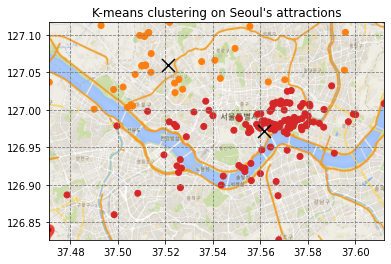

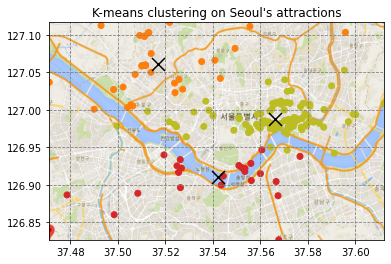

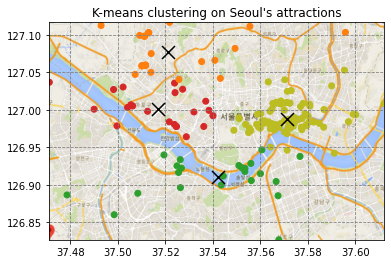

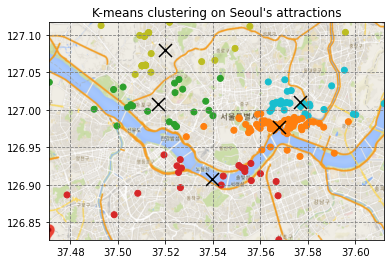

In [9]:
for n in range(2,5+1):
    kmeans_show(lati_long_datas, n)

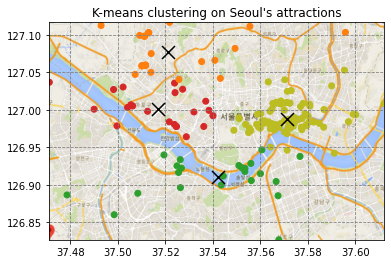

In [10]:
kmeans_4, Z =  kmeans_show(lati_long_datas, 4)

In [11]:
latlng_cluster_df = pd.DataFrame([pks, x,y,Z]).T
latlng_cluster_df.columns = ['pk','lat','lng','cluster']
latlng_cluster_df = latlng_cluster_df.set_index('pk')
latlng_cluster_df.head()

,lat,lng,cluster
pk,,,
1.0,37.577362,126.976684,2.0
2.0,37.612085,127.008250,2.0
3.0,37.564091,126.997940,2.0
4.0,37.580095,126.991849,2.0
5.0,37.536215,126.977762,0.0


In [12]:
len(latlng_cluster_df)

171

In [13]:
qs = Attraction.objects.all()

In [14]:
latlng_cluster_df['cluster'], uniques = pd.factorize(latlng_cluster_df['cluster'])

In [15]:
cluster_n= {1:[],2:[],3:[],0:[]}
for (pk, cluster) in latlng_cluster_df['cluster'].items():
    cluster_n[cluster].append(pk)

cluster_n

{1: [5.0,
  6.0,
  29.0,
  39.0,
  40.0,
  43.0,
  45.0,
  46.0,
  52.0,
  58.0,
  61.0,
  65.0,
  70.0,
  73.0,
  80.0,
  86.0,
  105.0,
  107.0,
  133.0,
  150.0,
  173.0,
  174.0],
 2: [8.0,
  19.0,
  21.0,
  26.0,
  28.0,
  49.0,
  63.0,
  66.0,
  69.0,
  75.0,
  79.0,
  88.0,
  123.0,
  127.0,
  131.0,
  135.0,
  146.0,
  147.0,
  148.0,
  154.0,
  164.0,
  165.0,
  167.0,
  168.0,
  171.0],
 3: [9.0,
  18.0,
  24.0,
  27.0,
  30.0,
  36.0,
  42.0,
  54.0,
  74.0,
  83.0,
  85.0,
  89.0,
  91.0,
  92.0,
  96.0,
  97.0,
  98.0,
  110.0,
  121.0,
  129.0,
  138.0,
  152.0,
  153.0,
  158.0,
  160.0,
  175.0,
  179.0],
 0: [1.0,
  2.0,
  3.0,
  4.0,
  7.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  20.0,
  22.0,
  23.0,
  25.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  37.0,
  38.0,
  41.0,
  44.0,
  47.0,
  48.0,
  50.0,
  51.0,
  53.0,
  55.0,
  56.0,
  57.0,
  59.0,
  62.0,
  64.0,
  67.0,
  68.0,
  71.0,
  72.0,
  76.0,
  77.0,
  78.0,
  81.0,
  82.0,
  84.

In [16]:
from itertools import permutations, combinations
from scipy.spatial import distance
import math

pk_pairs_n = []

for i, n_pk_list in cluster_n.items():
    new_pk_pairs = list(permutations(n_pk_list,2))
    pk_pairs_n.extend(new_pk_pairs)


In [17]:
print(int(180*179))

print(len(pk_pairs_n))

32220
11076


In [18]:
new_pairs = [(i, item) for (i, item) in latlng_cluster_df.iterrows()]

In [19]:
pk_pairs_n_d= {}

for (start_pk, start), (end_pk, end) in permutations(new_pairs,2):
    if start_pk not in pk_pairs_n_d:
        pk_pairs_n_d[start_pk] = {'0.5':[], '1.5':[], 'same':[]}
    
    isNAN = False
    for value in [start['lat'],start['lng'],end['lat'],end['lng']]:
        if math.isnan(value):
            isNAN = True
    
    if not isNAN:
        start_latlng = (start['lat']*111,start['lng']*91.17)
        end_latlng = (end['lat']*111,end['lng']*91.17)
        dist = distance.euclidean(start_latlng,end_latlng)
        if dist < 0.5:
            pk_pairs_n_d[start_pk]['0.5'].append((start_pk,end_pk))
        elif dist < 1.5:
            pk_pairs_n_d[start_pk]['1.5'].append((start_pk,end_pk))
        elif start['cluster'] == end['cluster']:
            pk_pairs_n_d[start_pk]['same'].append((start_pk,end_pk))
            
for i, item in pk_pairs_n_d.items():
    if len(item['same']) < 10:
        print("pk : ", i)
        print(item)

In [20]:
pk_pairs_n_d.keys()

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165

In [21]:
create_list = []

dist_dict = {'0.5':'5','1.5':'15','same':'30'}

qs = Attraction.objects.all()[:]

for pk in pk_pairs_n_d.keys():
    n_pair_dict = pk_pairs_n_d[pk]
    start_attr = qs.get(pk = pk)

    for key in ['0.5','1.5','same']:
        n_pair_list = n_pair_dict[key]
        for a_pair in n_pair_list:
            new_route = Route(start_pk = start_attr, end_pk = a_pair[1], dist= dist_dict[key])
            create_list.append(new_route)
    print(pk," is ended!")
            
print(create_list[::100])                 
print(len(create_list))

1.0  is ended!
2.0  is ended!
3.0  is ended!
4.0  is ended!
5.0  is ended!
6.0  is ended!
7.0  is ended!
8.0  is ended!
9.0  is ended!
10.0  is ended!
11.0  is ended!
12.0  is ended!
13.0  is ended!
14.0  is ended!
15.0  is ended!
16.0  is ended!
17.0  is ended!
18.0  is ended!
19.0  is ended!
20.0  is ended!
21.0  is ended!
22.0  is ended!
23.0  is ended!
24.0  is ended!
25.0  is ended!
26.0  is ended!
27.0  is ended!
28.0  is ended!
29.0  is ended!
30.0  is ended!
31.0  is ended!
32.0  is ended!
33.0  is ended!
34.0  is ended!
35.0  is ended!
36.0  is ended!
37.0  is ended!
38.0  is ended!
39.0  is ended!
40.0  is ended!
41.0  is ended!
42.0  is ended!
43.0  is ended!
44.0  is ended!
45.0  is ended!
46.0  is ended!
47.0  is ended!
48.0  is ended!
49.0  is ended!
50.0  is ended!
51.0  is ended!
52.0  is ended!
53.0  is ended!
54.0  is ended!
55.0  is ended!
56.0  is ended!
57.0  is ended!
58.0  is ended!
59.0  is ended!
61.0  is ended!
62.0  is ended!
63.0  is ended!
64.0  is ended!
6

In [23]:
Route.objects.bulk_create(create_list)

[<Route: Gyeongbokgung Palace -> 59.0>,
 <Route: Gyeongbokgung Palace -> 76.0>,
 <Route: Gyeongbokgung Palace -> 93.0>,
 <Route: Gyeongbokgung Palace -> 94.0>,
 <Route: Gyeongbokgung Palace -> 122.0>,
 <Route: Gyeongbokgung Palace -> 149.0>,
 <Route: Gyeongbokgung Palace -> 4.0>,
 <Route: Gyeongbokgung Palace -> 7.0>,
 <Route: Gyeongbokgung Palace -> 10.0>,
 <Route: Gyeongbokgung Palace -> 11.0>,
 <Route: Gyeongbokgung Palace -> 12.0>,
 <Route: Gyeongbokgung Palace -> 16.0>,
 <Route: Gyeongbokgung Palace -> 17.0>,
 <Route: Gyeongbokgung Palace -> 20.0>,
 <Route: Gyeongbokgung Palace -> 34.0>,
 <Route: Gyeongbokgung Palace -> 48.0>,
 <Route: Gyeongbokgung Palace -> 50.0>,
 <Route: Gyeongbokgung Palace -> 51.0>,
 <Route: Gyeongbokgung Palace -> 53.0>,
 <Route: Gyeongbokgung Palace -> 56.0>,
 <Route: Gyeongbokgung Palace -> 68.0>,
 <Route: Gyeongbokgung Palace -> 81.0>,
 <Route: Gyeongbokgung Palace -> 84.0>,
 <Route: Gyeongbokgung Palace -> 87.0>,
 <Route: Gyeongbokgung Palace -> 99.0>,
